In [1]:
from collections import defaultdict
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
poems = defaultdict(list)

In [4]:
with open('robert_frost.txt') as f:
    poems['text'] = f.readlines()

In [5]:
len(poems['text'])

1581

In [6]:
poems['labels'] = ['Robert Frost']*len(poems['text'])

In [7]:
with open('edgar_allan_poe.txt') as f:
    l = f.readlines()

In [8]:
poems['text'] = poems['text'] + l

In [9]:
poems['labels'] = poems['labels'] + ['Edgar Allan Poe']*len(l)

In [10]:
poems = pd.DataFrame.from_dict(poems)
poems

,text,labels
0,"Two roads diverged in a yellow wood,\n",Robert Frost
1,And sorry I could not travel both\n,Robert Frost
2,"And be one traveler, long I stood\n",Robert Frost
3,And looked down one as far as I could\n,Robert Frost
4,To where it bent in the undergrowth; \n,Robert Frost
...,...,...
2373,To a discordant melody;\n,Edgar Allan Poe
2374,"While, like a rapid ghastly river,\n",Edgar Allan Poe
2375,"Through the pale door,\n",Edgar Allan Poe
2376,"A hideous throng rush out forever,\n",Edgar Allan Poe


In [11]:
len(poems.loc[768]['text'])

1

In [12]:
print(poems.loc[768]['text'])

### Function to remove common punctuation and lower case the sentence

In [13]:
def remove_puctuation(df):
    
    df['text'] = df['text'].apply(lambda x : x.replace('\n',''))
    df['text'] = df['text'].apply(lambda x : x.replace(',',''))
    df['text'] = df['text'].apply(lambda x : x.replace(';',''))
    df['text'] = df['text'].apply(lambda x : x.replace(':',''))
    df['text'] = df['text'].apply(lambda x : x.replace('.',''))
    df['text'] = df['text'].apply(lambda x : x.replace('(',''))
    df['text'] = df['text'].apply(lambda x : x.replace(')',''))
    df['text'] = df['text'].apply(lambda x : x.replace('?',''))
    df['text'] = df['text'].apply(lambda x : x.replace('--',''))
    df['text'] = df['text'].apply(lambda x : x.lower())
    
    return df    


In [14]:
poems = remove_puctuation(poems)
poems

,text,labels
0,two roads diverged in a yellow wood,Robert Frost
1,and sorry i could not travel both,Robert Frost
2,and be one traveler long i stood,Robert Frost
3,and looked down one as far as i could,Robert Frost
4,to where it bent in the undergrowth,Robert Frost
...,...,...
2373,to a discordant melody,Edgar Allan Poe
2374,while like a rapid ghastly river,Edgar Allan Poe
2375,through the pale door,Edgar Allan Poe
2376,a hideous throng rush out forever,Edgar Allan Poe


In [15]:
poems['labels'].value_counts()

Robert Frost       1581
Edgar Allan Poe     797
Name: labels, dtype: int64

<AxesSubplot:xlabel='labels', ylabel='count'>

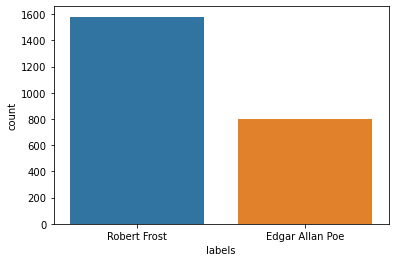

In [16]:
sns.countplot(data=poems,x='labels')

In [17]:
y = poems['labels']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(poems, y, test_size=0.3, random_state=101)

In [19]:
y_train.value_counts()

Robert Frost       1101
Edgar Allan Poe     563
Name: labels, dtype: int64

In [20]:
X_train

,text,labels
110,as often as i've seen it done before,Robert Frost
1026,'i know and it was raining,Robert Frost
2335,on its roof did float and flow,Edgar Allan Poe
1083,disturbed the slumbering village street,Robert Frost
1336,lord if i were to dream of everyone,Robert Frost
...,...,...
599,unless it be,Robert Frost
1599,but light from out the lurid sea,Edgar Allan Poe
1361,estelle's to take me when she's settled down,Robert Frost
1547,'how are you neighbour just the man i'm after,Robert Frost


### Mapping unique words to index and frequency counter

In [21]:
poet_groupby = X_train.groupby(by='labels')
for idx, df in poet_groupby:
    print(idx)

Edgar Allan Poe
Robert Frost


In [22]:
poet_groupby.get_group('Edgar Allan Poe')

,text,labels
2335,on its roof did float and flow,Edgar Allan Poe
1802,of all who on despair's unhallowed bed,Edgar Allan Poe
1797,the blotting utterly from out high heaven,Edgar Allan Poe
1911,the unembodied essence and no more,Edgar Allan Poe
1973,with storms- but where meanwhile,Edgar Allan Poe
...,...,...
1728,then my heart it grew ashen and sober,Edgar Allan Poe
2364,shall dawn upon him desolate!,Edgar Allan Poe
1668,remembered not the dank tarn of auber,Edgar Allan Poe
2045,venuses unextinguished by the sun!,Edgar Allan Poe


In [23]:
words_robert_frost = {}
words_robert_frost_freq = defaultdict(int)

idx = 0

for sentc in poet_groupby.get_group('Robert Frost')['text']:
    words = sentc.split()
    for word in words:
        words_robert_frost_freq[word]+=1
        if word not in words_robert_frost.keys():
            words_robert_frost[word] = idx
            idx+=1

len(words_robert_frost)

1896

In [24]:
words_edgar = {}
words_edgar_freq = defaultdict(int)

idx = 0

for sentc in poet_groupby.get_group('Edgar Allan Poe')['text']:
    words = sentc.split()
    for word in words:
        words_edgar_freq[word]+=1
        if word not in words_edgar.keys():
            words_edgar[word] = idx
            idx+=1

len(words_edgar)

1172

In [25]:
states_robert_frost = len(words_robert_frost)
states_edgar = len(words_edgar)

## Creating State transition matrix for both poets and initialisation state distribution

In [26]:
matrix_robert = [[0]*len(words_robert_frost)]*len(words_robert_frost)
matrix_edgar = [[0]*len(words_edgar)]*len(words_edgar)

In [27]:
total_words_robert_frost = np.sum(list(words_robert_frost_freq.values()))
total_words_robert_frost

7535

In [28]:
total_words_edgar = np.sum(list(words_edgar_freq.values()))
total_words_edgar

3421

### Initial State Distribution

In [29]:
epsilon = 0.001

In [30]:
pi_robert_frost = [np.log10((word_freq+epsilon)/(total_words_robert_frost + epsilon*states_robert_frost)) for word_freq in list(words_robert_frost_freq.values())]
len(pi_robert_frost)

1896

In [31]:
pi_robert_frost[:10]

[-2.15290845881839,
 -3.2750239711983866,
 -2.9229017608762566,
 -3.1781356680297157,
 -1.835795889305451,
 -2.9229017608762566,
 -2.9229017608762566,
 -2.598416064621739,
 -2.496963185639346,
 -1.587155684069387]

In [32]:
pi_edgar = [np.log10((word_freq + epsilon)/(total_words_edgar + epsilon*states_edgar)) for word_freq in list(words_edgar_freq.values())]
len(pi_edgar)

1172

In [33]:
pi_edgar[:10]

[-2.3038273662406676,
 -2.534258406324964,
 -3.5338677561225076,
 -3.0570358381769736,
 -3.5338677561225076,
 -1.481219546821413,
 -3.5338677561225076,
 -1.3944196001505291,
 -2.1029219847598903,
 -2.492869668921561]

### State Transition Matrix

In [34]:
for sentc in poet_groupby.get_group('Robert Frost')['text']:
    
    words = sentc.split()
    for word_prev in words:
        for word_next in words:
            
            index_word_prev = words_robert_frost[word_prev]
            index_word_next = words_robert_frost[word_next]
            
            matrix_robert[index_word_prev][index_word_next]+=1

In [35]:
for sentc in poet_groupby.get_group('Edgar Allan Poe')['text']:
    
    words = sentc.split()
    for word_prev in words:
        for word_next in words:
            
            index_word_prev = words_edgar[word_prev]
            index_word_next = words_edgar[word_next]
            
            matrix_edgar[index_word_prev][index_word_next]+=1

In [36]:
state_transition_prev_next_robert = []

for prev in matrix_robert:
    state_transition_prev_next_robert.append(np.sum(prev))
    
len(state_transition_prev_next_robert)

1896

In [37]:
state_transition_prev_next_edgar = []

for prev in matrix_edgar:
    state_transition_prev_next_edgar.append(np.sum(prev))
    
len(state_transition_prev_next_edgar)

1172

In [38]:
matrix_robert_sub = [[0]*len(words_robert_frost)]*len(words_robert_frost)
matrix_edgar_sub = [[0]*len(words_edgar)]*len(words_edgar)

In [39]:
for i in range(states_robert_frost):
    for j in range(states_robert_frost):
        matrix_robert_sub[i][j] = np.log10((matrix_robert[i][j]+epsilon)/(state_transition_prev_next_robert[i] + epsilon*states_robert_frost))

In [40]:
matrix_robert_sub[0][:10]

[-2.1124741098688733,
 -3.230102464282067,
 -2.9055977219731393,
 -3.1843461800631188,
 -1.824521080829209,
 -2.8999206632934795,
 -2.9171794400817417,
 -2.672470335596642,
 -2.4539765487321716,
 -1.6071522768565896]

In [41]:
for i in range(states_edgar):
    for j in range(states_edgar):
        matrix_edgar_sub[i][j] = np.log10((matrix_edgar[i][j]+epsilon)/(state_transition_prev_next_edgar[i] + epsilon*states_edgar))

In [42]:
matrix_edgar_sub[0][:10]

[-2.276022765653348,
 -2.5544419917069394,
 -3.548137298869566,
 -3.1145209185658667,
 -3.548137298869566,
 -1.4721308051472963,
 -3.548137298869566,
 -1.3950376020593953,
 -2.0731490124514007,
 -2.4488097692348165]

### Training the model

In [43]:
X_train.loc[X_train['text']=='']

,text,labels
1250,,Robert Frost
790,,Robert Frost
1853,,Edgar Allan Poe
1571,,Robert Frost
1638,,Edgar Allan Poe
...,...,...
540,,Robert Frost
394,,Robert Frost
436,,Robert Frost
371,,Robert Frost


In [44]:
X_test.loc[X_test['text']=='']

,text,labels
768,,Robert Frost
172,,Robert Frost
455,,Robert Frost
257,,Robert Frost
1116,,Robert Frost
...,...,...
1046,,Robert Frost
177,,Robert Frost
1751,,Edgar Allan Poe
242,,Robert Frost


In [45]:
drop_index_test = X_test.loc[X_test['text']==''].index
drop_index_train = X_train.loc[X_train['text']==''].index

In [46]:
X_test = X_test.drop(drop_index_test)
y_test = y_test.drop(drop_index_test)

In [47]:
X_train = X_train.drop(drop_index_train)
y_train = y_train.drop(drop_index_train)

In [48]:
X_train.loc[X_train['text']=='']

,text,labels


In [49]:
X_test.loc[X_test['text']=='']

,text,labels


### Testing on X_test

In [50]:
new_word_robert_frost_pi = np.log10(epsilon/(total_words_robert_frost + epsilon*states_robert_frost))
new_word_edgar_pi = np.log10(epsilon/(total_words_edgar + epsilon*states_edgar))

In [51]:
new_word_edgar_pi

-6.534301833601826

In [52]:
new_word_robert_frost_pi

-6.877192522577384

In [53]:
new_word_robert_frost_matrix = np.log10(1.0/states_robert_frost)
new_word_edgar_matrix = np.log10(1.0/states_edgar)

In [54]:
new_word_edgar_matrix

-3.0689276116820716

In [55]:
new_word_robert_frost_matrix

-3.2778383330020473

In [56]:
X_test

,text,labels
1125,who only has at heart your getting lost,Robert Frost
1933,not long ago the writer of these lines,Edgar Allan Poe
495,except it seemed the poetess's poems,Robert Frost
300,but most would have to think of the expense,Robert Frost
1602,of scultur'd ivy and stone flowers,Edgar Allan Poe
...,...,...
1277,with the furthest bodies,Robert Frost
867,all claiming some priority in starkness,Robert Frost
1562,it lifts existence on a plane of snow,Robert Frost
1242,of dust and feather,Robert Frost


In [57]:
y_test

1125       Robert Frost
1933    Edgar Allan Poe
495        Robert Frost
300        Robert Frost
1602    Edgar Allan Poe
             ...       
1277       Robert Frost
867        Robert Frost
1562       Robert Frost
1242       Robert Frost
569        Robert Frost
Name: labels, Length: 652, dtype: object

In [58]:
def evaluate(sentc : str)->str:
    
    words = sentc.split()
    
    eval_robert_frost = 0
    eval_edgar = 0
    
    if words[0] not in words_robert_frost.keys():
        eval_robert_frost+=new_word_robert_frost_pi
    else:
        eval_robert_frost+=pi_robert_frost[words_robert_frost[words[0]]]
    
    if words[0] not in words_edgar.keys():
        eval_edgar+=new_word_edgar_pi
    else :
        eval_edgar+=pi_edgar[words_edgar[words[0]]]
    
    for i in range(1,len(words)):
        
        if (words[i] in words_robert_frost.keys()) and (words[i-1] in words_robert_frost.keys()):
            eval_robert_frost+=matrix_robert_sub[words_robert_frost[words[i-1]]][words_robert_frost[words[i]]]
        else:
            eval_robert_frost+=new_word_robert_frost_matrix
        
        if (words[i] in words_edgar.keys()) and (words[i-1] in words_edgar .keys()):
            eval_edgar+=matrix_edgar_sub[words_edgar[words[i-1]]][words_edgar[words[i]]]
        else:
            eval_edgar+=new_word_edgar_matrix
        
        
    if eval_robert_frost>=eval_edgar:
        return 'Robert Frost'
    
    return 'Edgar Allan Poe'

In [59]:
X_test['y pred'] = X_test['text'].apply(evaluate)

In [60]:
X_test

,text,labels,y pred
1125,who only has at heart your getting lost,Robert Frost,Edgar Allan Poe
1933,not long ago the writer of these lines,Edgar Allan Poe,Edgar Allan Poe
495,except it seemed the poetess's poems,Robert Frost,Robert Frost
300,but most would have to think of the expense,Robert Frost,Edgar Allan Poe
1602,of scultur'd ivy and stone flowers,Edgar Allan Poe,Edgar Allan Poe
...,...,...,...
1277,with the furthest bodies,Robert Frost,Edgar Allan Poe
867,all claiming some priority in starkness,Robert Frost,Edgar Allan Poe
1562,it lifts existence on a plane of snow,Robert Frost,Edgar Allan Poe
1242,of dust and feather,Robert Frost,Edgar Allan Poe


In [62]:
print(classification_report(y_pred=X_test['y pred'],y_true=y_test))

                 precision    recall  f1-score   support

Edgar Allan Poe       0.47      0.83      0.60       212
   Robert Frost       0.87      0.56      0.68       440

       accuracy                           0.65       652
      macro avg       0.67      0.69      0.64       652
   weighted avg       0.74      0.65      0.66       652



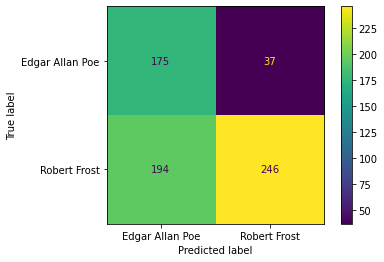

In [66]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_pred=X_test['y pred'],y_true=y_test),display_labels=['Edgar Allan Poe','Robert Frost']).plot()